In [1]:
## Examination of filtering



In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os

In [3]:
basedir = '/data/brainsss/processed/fly_001/func_0'
origfile = os.path.join(basedir, 'imaging/functional_channel_2.nii')
mocofile = os.path.join(basedir, 'preproc/functional_channel_2_moco.h5')
hpffile = os.path.join(basedir, 'preproc/functional_channel_2_moco_hpf.h5')


basedir = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_134/func_0'
origfile = os.path.join(basedir, 'imaging/functional_channel_2.nii')
mocofile = os.path.join(basedir, 'moco/functional_channel_2_moco.h5')
hpffile = os.path.join(basedir, 'functional_channel_2_moco_zscore_highpass.h5')

orig = nib.load(origfile).dataobj


In [4]:
m = h5py.File(mocofile, 'r') 
moco = m['data']

In [5]:
# voxel with high signal: 38 60 29 or 232 89 32
# voxel with low_signal: 139 78 32
voxels = {
    'high': [232, 89, 32],
    'low': [139, 78, 32]
}


In [6]:
voxel_to_use = 'high'

x, y, z = voxels[voxel_to_use]




In [7]:
def plot_timeseries(voxel, linewidth = .2):
    """voxel is a list with xyz coordinates"""
    x, y, z = voxel
    origdata = orig[x, y, z, :]
    with h5py.File(mocofile, 'r') as f:
        mocodata = f['data'][x, y, z, :]

    with h5py.File(hpffile, 'r') as f:
        hpfdata = f['data'][x, y, z, :]
        x, y, z = voxel


    plt.figure(figsize=(10,12))
    plt.subplot(311)
    plt.plot(origdata, linewidth=linewidth)
    plt.title(f'original data - {voxel}')
    plt.subplot(312)
    plt.plot(mocodata, linewidth=linewidth)
    plt.title(f'moco data - {voxel}')
    plt.subplot(313)
    plt.plot(hpfdata, linewidth=linewidth)
    plt.title(f'hpf data - {voxel}')

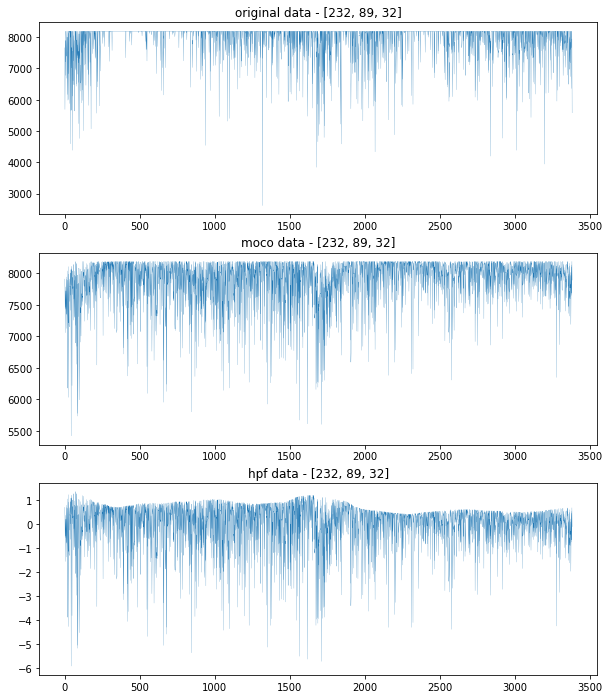

In [8]:
plot_timeseries(voxels['high'])

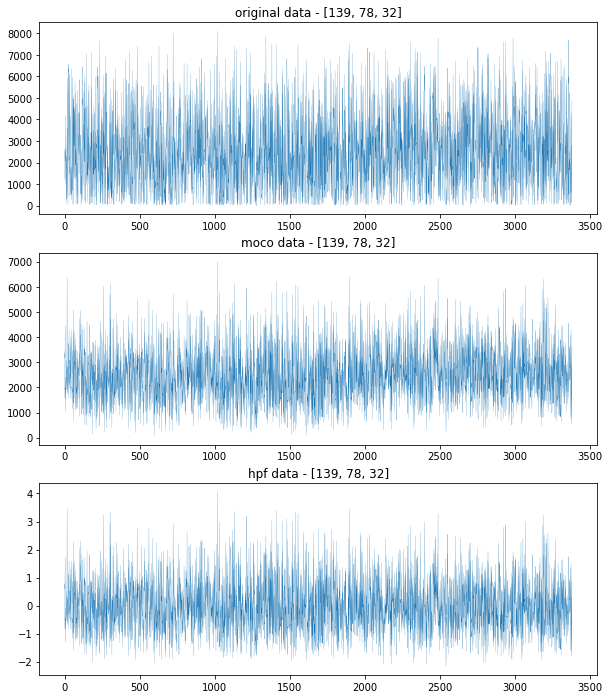

In [9]:
plot_timeseries(voxels['low'])

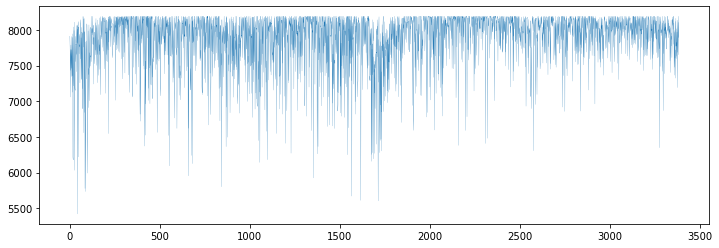

In [10]:
## assess impact of transformation to reduce skewness

voxel_to_use = 'high'
x, y, z = voxels[voxel_to_use]

with h5py.File(mocofile, 'r') as f:
    moco_ts = f['data'][x, y, z, :]

plt.figure(figsize=(12, 4))

plt.plot(moco_ts, linewidth=.2)

In [21]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)

moco_ts_trans = pt.fit_transform(moco_ts.reshape(-1, 1))

/home/users/russpold/miniconda3/envs/brainsss/lib/python3.9/site-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/users/russpold/miniconda3/envs/brainsss/lib/python3.9/site-packages/numpy/core/_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


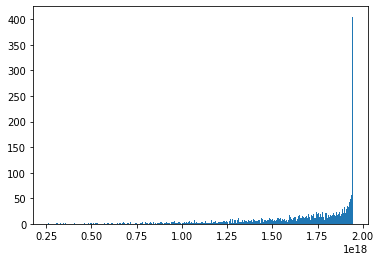

In [22]:
_ = plt.hist(, 500)

In [12]:
import sys
sys.path.append('../scripts')
from imgskewness import imgskewness

skew = imgskewness(mocofile)

computing mean of h5 file


KeyError: "Unable to open object (object 'qform' doesn't exist)"

In [ ]:
np.mean(moco_ts == np.max(moco_ts))